In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 10.1 Brownian motion in a harmonic trap

In [3]:
traj1 = np.loadtxt('trajectory_10-1.dat.bz2', dtype=float)
traj2 = np.loadtxt('trajectory_10-2.dat.bz2', dtype=float)
traj3 = np.loadtxt('trajectory_10-3.dat.bz2', dtype=float)

* first line: Δ𝑡 the time interval between the samples
* columns: x, y, z coordinates
* rows: entities of a time series

In [4]:
print('traj1.shape', traj1.shape)
print('traj2.shape', traj2.shape)
print('traj3.shape', traj3.shape)

traj1.shape (50000, 3)
traj2.shape (1000000, 3)
traj3.shape (1000000, 3)


### a) Mean-square displacement:

In [47]:
def mean_square_displacemen(traj):
    ms = []
    for i in range(traj.shape[1]):
        ms.append((traj[:,i] - traj[0,i])**2)
    return sum(ms)

In [57]:
msd1 = mean_square_displacemen(traj1[0:10**5])
msd2 = mean_square_displacemen(traj2[0:10**5])
msd3 = mean_square_displacemen(traj3[0:10**5])

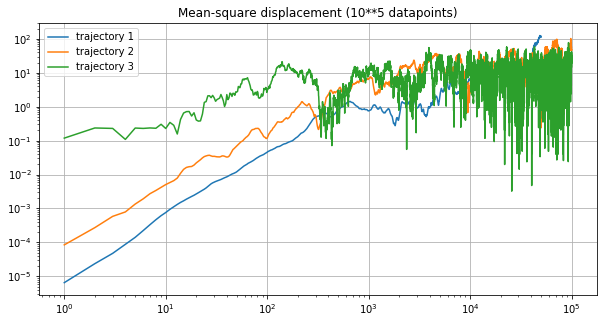

In [61]:
plt.figure(figsize=(10,5))
plt.loglog(msd1, label='trajectory 1')
plt.loglog(msd2, label='trajectory 2')
plt.loglog(msd3, label='trajectory 3')
plt.grid(True)
plt.title('Mean-square displacement (10**5 datapoints)')
plt.legend()

### b) Power spectral density

In [5]:
from scipy import signal

In [6]:
d_t = 0.002

In [21]:
def power_spectral_density(traj):
#     T = len(traj)
    dt = 0.002
    fs = 1/dt
    
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    for i in range(traj.shape[1]):
#         freqs, psd = signal.welch(traj[:,i], dt)
#         ax[i].semilogx(freqs, psd)

#         ps = np.abs(np.fft.fft(traj[:,i]))**2
#         time_step = 1 / 3000
#         freqs = np.fft.fftfreq(traj[:,i].size, dt)
#         idx = np.argsort(freqs)
#         ax[i].semilogx(freqs[idx], ps[idx])
        

        f, Pxx_den = signal.periodogram(traj[:,i], fs)
        ax[i].semilogy(f, Pxx_den)
        
        
        ax[i].set_xlabel('frequency')
        ax[i].set_ylabel('PSD')
    plt.tight_layout()

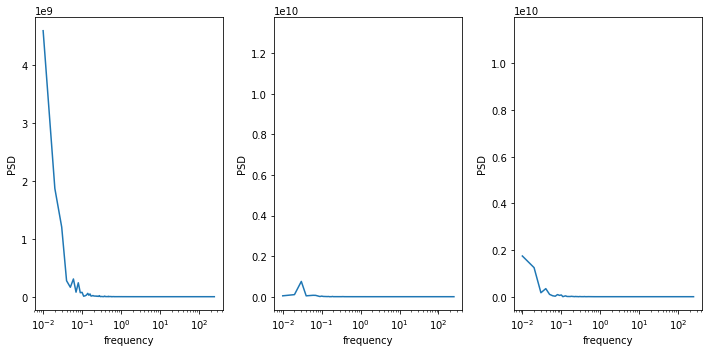

In [18]:
power_spectral_density(traj1)

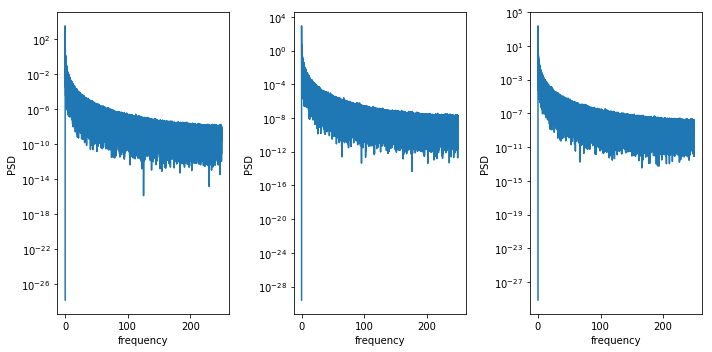

In [22]:
power_spectral_density(traj2)

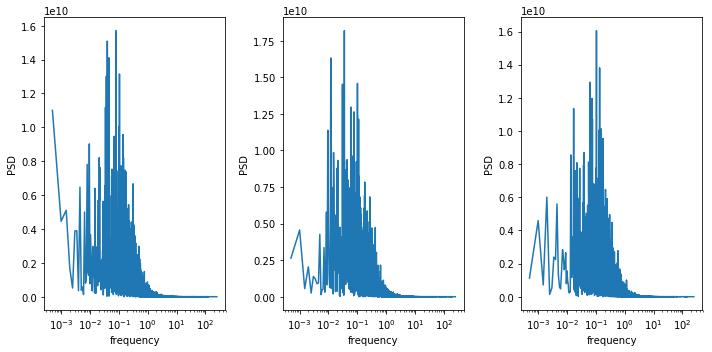

In [20]:
power_spectral_density(traj3)

### Wiener–Khinchin theorem:

### c) Multiple-𝜏 correlation algorithm

In [ ]:
l = 10